In [215]:
import numpy as np
import matplotlib.pyplot as plt
from kmeans_algorithm import kmeans, initialize_centroids, recalculate_centroids, inertia, apply_get_labels, get_labels, euclidean_distance

In [216]:
def plot_original_and_clustered_data(original_data, clustered_data, centroids, model_inertia):
    _, axs = plt.subplots(1, 2, figsize=(9, 4))

    ax1 = axs[0]
    ax2 = axs[1]

    ax1.grid(True)
    ax1.scatter(original_data[:, 0], original_data[:, 1], color='blue')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Original data')

    ax2.grid(True)
    ax2.scatter(clustered_data[:, 0], clustered_data[:, 1], c=clustered_data[:, 2])
    ax2.scatter(np.array(list(centroids.values()))[:, 0], np.array(list(centroids.values()))[:, 1], s=100, c='red')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Clustered data with inertia: ' + str(np.round(model_inertia, 2)))
    plt.show()

In [217]:
def plot_iterations(data, dic_centroids, n_iterations):
    fig, axs = plt.subplots(1, n_iterations, figsize=(15, 4))

    dic = initialize_centroids(data, 3, 'kmeans++')

    for i in range(n_iterations):
        if i != 0:
            dic_centroids = recalculate_centroids(data_labels, dic_centroids, 2)
        
        labels = np.apply_along_axis(apply_get_labels, axis=1, arr=data, dic_centroids=dic_centroids)
        data_labels = data.copy()
        data_labels = np.append(data_labels, np.expand_dims(labels, axis=1), axis=1)

        ax = axs[i]

        ax.scatter(data_labels[:, 0], data_labels[:, 1], c=data_labels[:, 2])
        ax.scatter(np.array(list(dic_centroids.values()))[:, 0], np.array(list(dic_centroids.values()))[:, 1], s=100, c='red')
        
        ax.set_title(f'Iteración {i+1}')

    plt.tight_layout()
    plt.show()

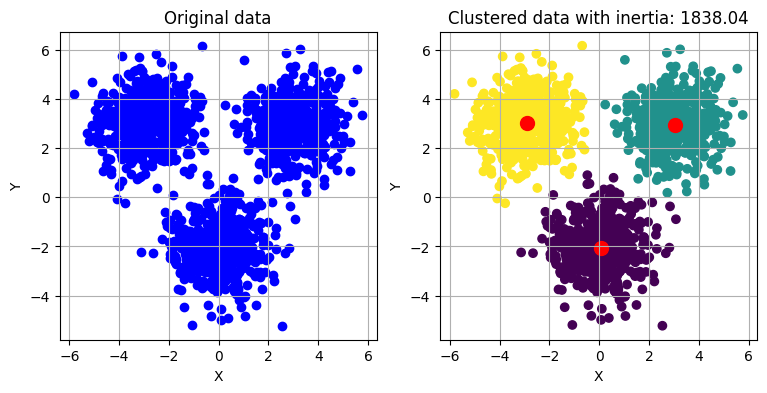

In [218]:
n = 500

x_1 = np.random.normal(loc=0, scale=1, size=n)
y_1 = np.random.normal(loc=-2, scale=1, size=n)

x_2 = np.random.normal(loc=3, scale=1, size=n)
y_2 = np.random.normal(loc=3, scale=1, size=n)

x_3 = np.random.normal(loc=-3, scale=1, size=n)
y_3 = np.random.normal(loc=3, scale=1, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3)).T, np.concatenate((y_1, y_2, y_3)).T]).T

labels, centroids, model_inertia = kmeans(data=data, k=3, initialization='kmeans++', n_init=5, max_iter=10)

plot_original_and_clustered_data(data, labels, centroids, model_inertia)

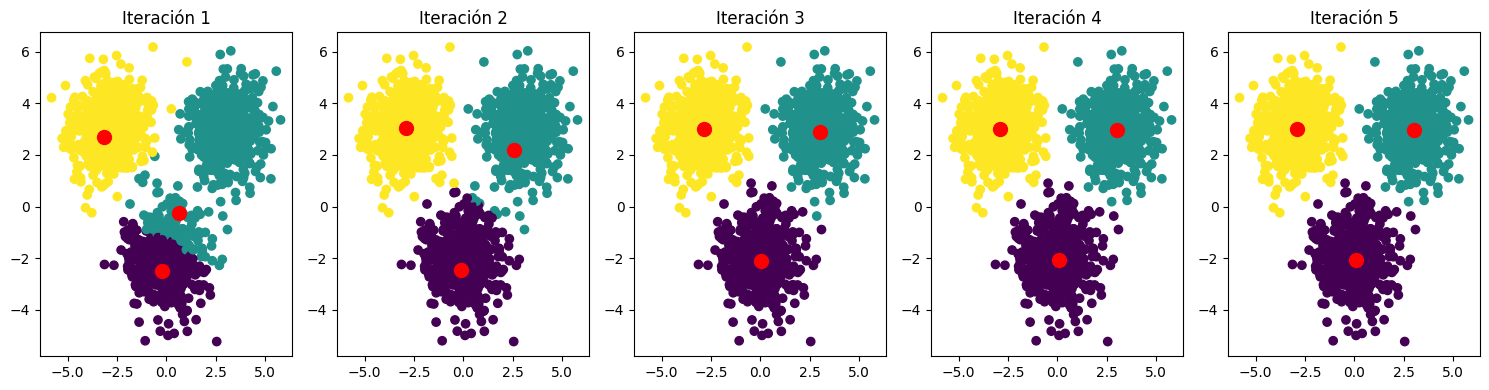

In [219]:
plot_iterations(data, initialize_centroids(data, k=3, mode='random'), n_iterations=5)

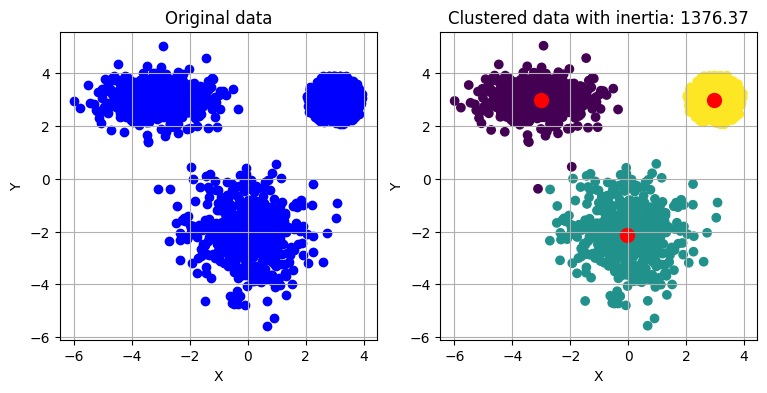

In [220]:
n = 500

# Grupo 1 - Normal
x_1 = np.random.normal(loc=0, scale=1, size=n)
y_1 = np.random.normal(loc=-2, scale=1, size=n)

# Grupo 2 - Círculo
r = np.random.uniform(0, 1, size=n)
theta = np.random.uniform(0, 2 * np.pi, size=n)
x_2 = 3 + r * np.cos(theta)
y_2 = 3 + r * np.sin(theta)

# Grupo 3 - Elipse
x_3 = np.random.normal(loc=-3, scale=1, size=n)
y_3 = np.random.normal(loc=3, scale=0.5, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3)), np.concatenate((y_1, y_2, y_3))]).T

labels, centroids, model_inertia = kmeans(data=data, k=3, initialization='kmeans++', n_init=5, max_iter=10)

plot_original_and_clustered_data(data, labels, centroids, model_inertia)

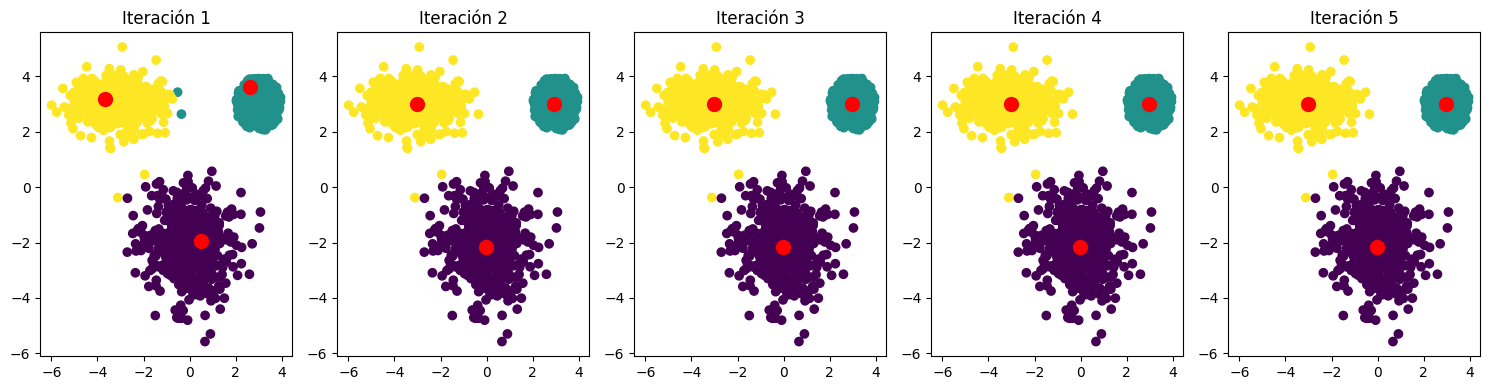

In [221]:
plot_iterations(data, initialize_centroids(data, k=3, mode='random'), n_iterations=5)

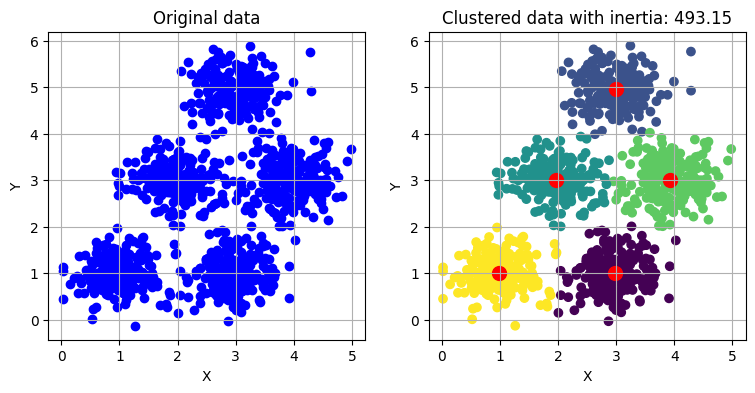

In [222]:
n = 200
s = 0.4

x_1 = np.random.normal(loc=1, scale=s, size=n)
y_1 = np.random.normal(loc=1, scale=s, size=n)

x_2 = np.random.normal(loc=3, scale=s, size=n)
y_2 = np.random.normal(loc=1, scale=s, size=n)

x_3 = np.random.normal(loc=2, scale=s, size=n)
y_3 = np.random.normal(loc=3, scale=s, size=n)

x_4 = np.random.normal(loc=3, scale=s, size=n)
y_4 = np.random.normal(loc=5, scale=s, size=n)

x_5 = np.random.normal(loc=4, scale=s, size=n)
y_5 = np.random.normal(loc=3, scale=s, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3, x_4, x_5)), np.concatenate((y_1, y_2, y_3, y_4, y_5))]).T

labels, centroids, model_inertia = kmeans(data=data, k=5, initialization='random', n_init=10, max_iter=10)

plot_original_and_clustered_data(data, labels, centroids, model_inertia)

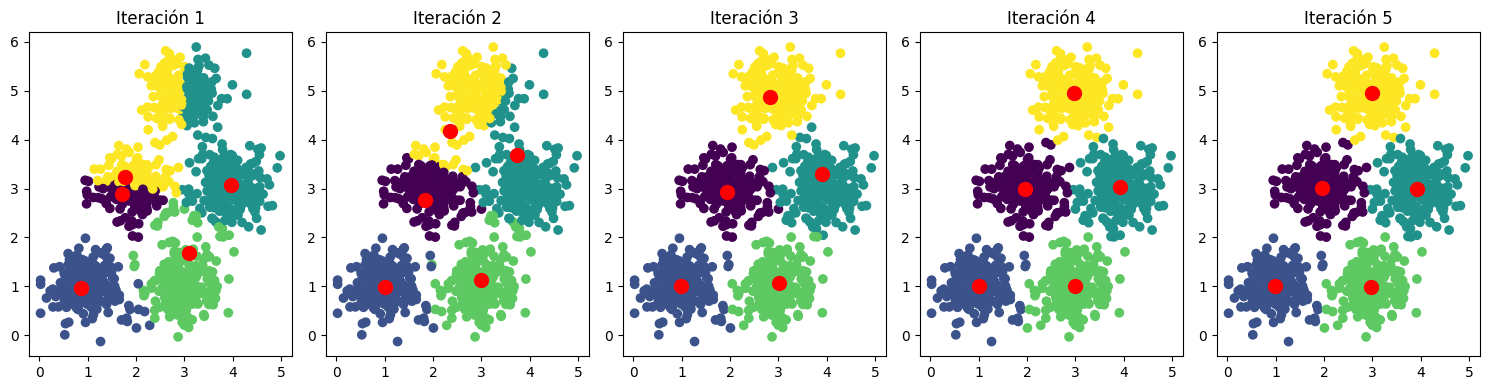

In [223]:
plot_iterations(data, initialize_centroids(data, k=5, mode='random'), n_iterations=5)

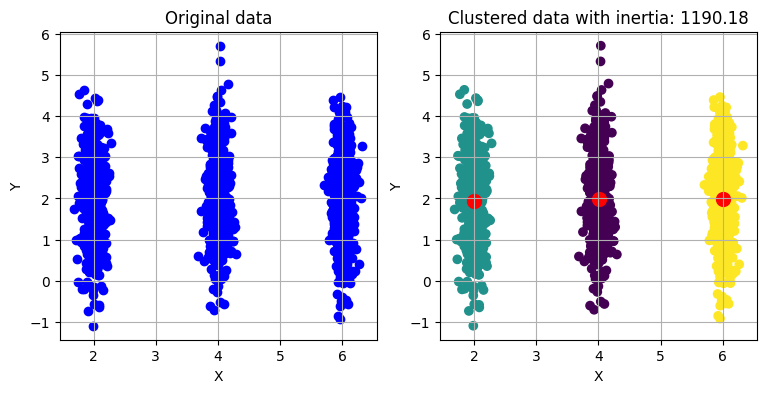

In [224]:
n = 500

x_1 = np.random.normal(loc=2, scale=0.1, size=n)
y_1 = np.random.normal(loc=2, scale=1, size=n)

x_2 = np.random.normal(loc=4, scale=0.1, size=n)
y_2 = np.random.normal(loc=2, scale=1, size=n)

x_3 = np.random.normal(loc=6, scale=0.1, size=n)
y_3 = np.random.normal(loc=2, scale=1, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3)), np.concatenate((y_1, y_2, y_3))]).T

labels, centroids, model_inertia = kmeans(data=data, k=3, initialization='kmeans++', n_init=3, max_iter=30)

plot_original_and_clustered_data(data, labels, centroids, model_inertia)

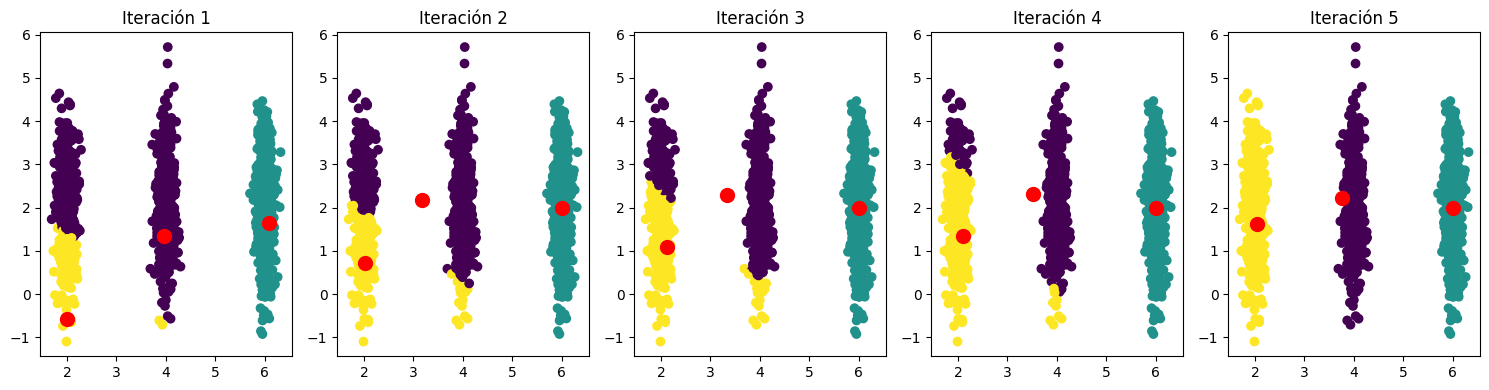

In [225]:
plot_iterations(data, initialize_centroids(data, k=3, mode='random'), n_iterations=5)

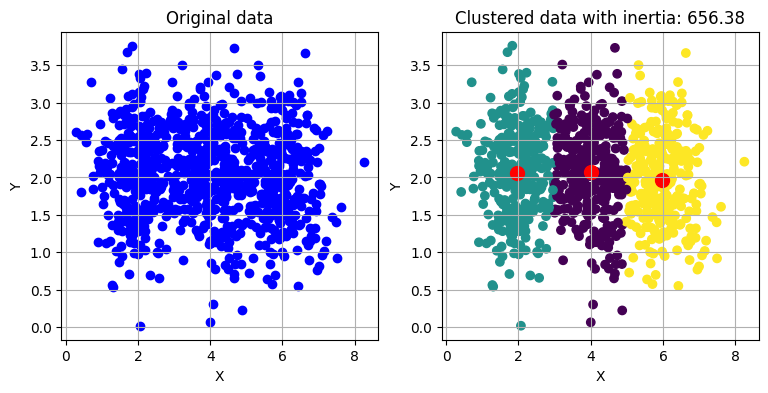

In [226]:
n = 300
s = 0.6

x_1 = np.random.normal(loc=2, scale=s, size=n)
y_1 = np.random.normal(loc=2, scale=s, size=n)

x_2 = np.random.normal(loc=4, scale=s, size=n)
y_2 = np.random.normal(loc=2, scale=s, size=n)

x_3 = np.random.normal(loc=6, scale=s, size=n)
y_3 = np.random.normal(loc=2, scale=s, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3)).T, np.concatenate((y_1, y_2, y_3)).T]).T

labels, centroids, model_inertia = kmeans(data=data, k=3, initialization='kmeans++', n_init=5, max_iter=30)

plot_original_and_clustered_data(data, labels, centroids, model_inertia)

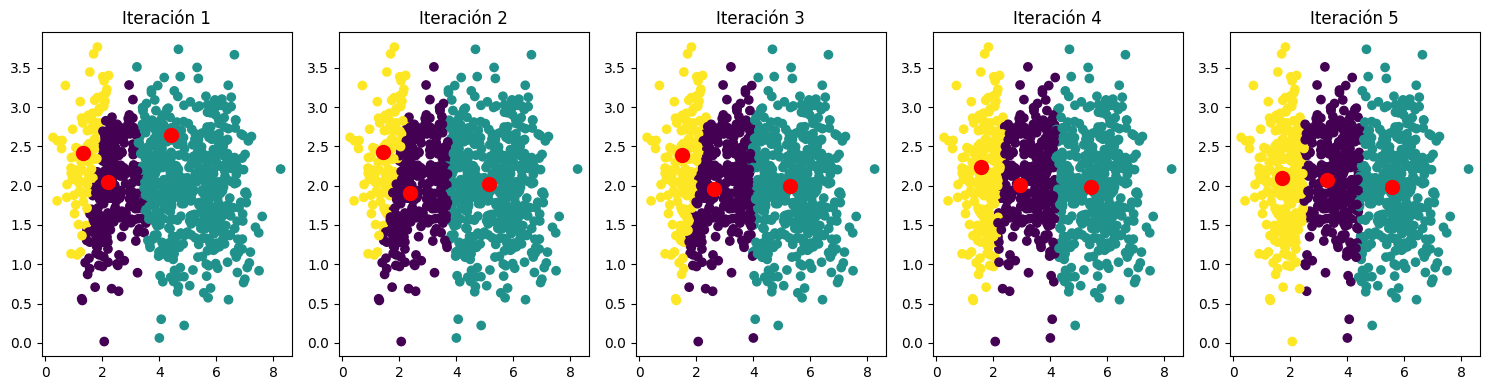

In [227]:
plot_iterations(data, initialize_centroids(data, k=3, mode='random'), n_iterations=5)

In [228]:
model_inertia

656.381846193754

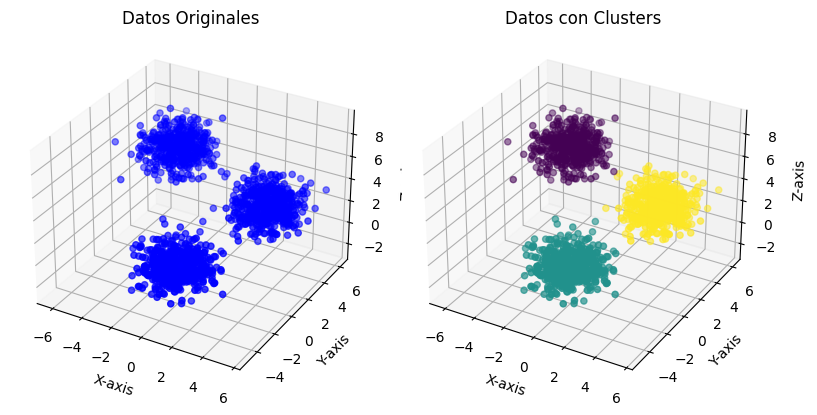

In [242]:
n = 500

x_1 = np.random.normal(loc=0, scale=1, size=n)
y_1 = np.random.normal(loc=-2, scale=1, size=n)
z_1 = np.random.normal(loc=0, scale=1, size=n)

x_2 = np.random.normal(loc=3, scale=1, size=n)
y_2 = np.random.normal(loc=3, scale=1, size=n)
z_2 = np.random.normal(loc=3, scale=1, size=n)

x_3 = np.random.normal(loc=-3, scale=1, size=n)
y_3 = np.random.normal(loc=3, scale=1, size=n)
z_3 = np.random.normal(loc=6, scale=1, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3)), 
                 np.concatenate((y_1, y_2, y_3)), 
                 np.concatenate((z_1, z_2, z_3))]).T

labels, centroids, model_inertia = kmeans(data=data, k=3, initialization='kmeans++', n_init=5, max_iter=30)

# 3D plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={'projection': '3d'})

# Gráfico de puntos originales
axs[0].scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o')
axs[0].set_title('Datos Originales')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_zlabel('Z-axis')

# Gráfico de puntos con colores por clusters
axs[1].scatter(labels[:, 0], labels[:, 1], labels[:, 2], c=labels[:, 3], marker='o')
axs[1].set_title('Datos con Clusters')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].set_zlabel('Z-axis')

plt.tight_layout()
plt.show()

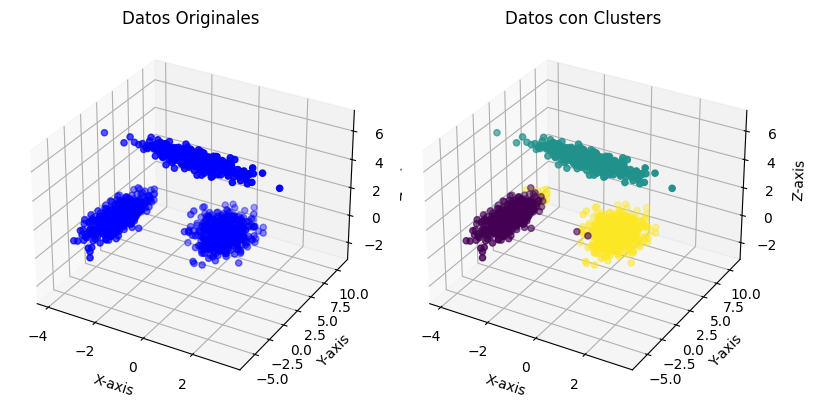

In [265]:
n = 500

x_1 = np.random.normal(loc=0, scale=0.5, size=n)
y_1 = np.random.normal(loc=6, scale=1.5, size=n)
z_1 = np.random.normal(loc=-1, scale=0.5, size=n)

x_2 = np.random.normal(loc=-3, scale=0.3, size=n)
y_2 = np.random.normal(loc=0, scale=2, size=n)
z_2 = np.random.normal(loc=1, scale=0.3, size=n)

x_3 = np.random.normal(loc=0, scale=1, size=n)
y_3 = np.random.normal(loc=1, scale=0.3, size=n)
z_3 = np.random.normal(loc=6, scale=0.3, size=n)

data = np.array([np.concatenate((x_1, x_2, x_3)), 
                 np.concatenate((y_1, y_2, y_3)), 
                 np.concatenate((z_1, z_2, z_3))]).T

labels, centroids, model_inertia = kmeans(data=data, k=3, initialization='kmeans++', n_init=5, max_iter=30)

# 3D plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={'projection': '3d'})

# Gráfico de puntos originales
axs[0].scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o')
axs[0].set_title('Datos Originales')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_zlabel('Z-axis')

# Gráfico de puntos con colores por clusters
axs[1].scatter(labels[:, 0], labels[:, 1], labels[:, 2], c=labels[:, 3], marker='o')
axs[1].set_title('Datos con Clusters')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].set_zlabel('Z-axis')

plt.tight_layout()
plt.show()